### 01. Importing libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 02. Importing data frame

In [3]:
df_ords_prods_cust = pd.read_pickle(r'C:\Users\veren\Python Data\26-10-2021 Instacart Basket Analysis\02 Data\Prepared Data\ords_prods_cust_merged_1.pkl')

In [4]:
df_ords_prods_cust.shape

(30356128, 32)

In [5]:
df_ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,family_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


In [6]:
df_ords_prods_cust.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending',
       'spending_flag', 'frequency', 'frequency_flag', 'first_name', 'surname',
       'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'family_status', 'income'],
      dtype='object')

<AxesSubplot:xlabel='prices', ylabel='prices'>

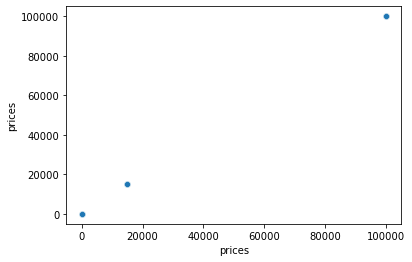

In [7]:
# Exploring the data with a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_cust)

In [8]:
# Identifying prices higher than 100
df_ords_prods_cust.loc[df_ords_prods_cust['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,family_status,income
21681,33664,2 % Reduced Fat Milk,84,16,99999.0,1489110,43360,3,1,10,...,Frequent customer,Marilyn,Baker,Female,Florida,67,7/16/2017,3,married,149199
21682,33664,2 % Reduced Fat Milk,84,16,99999.0,2322035,43360,4,1,10,...,Frequent customer,Marilyn,Baker,Female,Florida,67,7/16/2017,3,married,149199
21683,33664,2 % Reduced Fat Milk,84,16,99999.0,420339,43360,5,1,10,...,Frequent customer,Marilyn,Baker,Female,Florida,67,7/16/2017,3,married,149199
21684,33664,2 % Reduced Fat Milk,84,16,99999.0,2912515,43360,7,2,9,...,Frequent customer,Marilyn,Baker,Female,Florida,67,7/16/2017,3,married,149199
27078,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,518829,54136,22,1,9,...,Regular customer,Benjamin,Parsons,Male,New Jersey,40,1/28/2020,0,single,160524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30331638,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,285306,136909,4,1,17,...,Frequent customer,Deborah,Dillon,Female,New Jersey,30,5/14/2017,2,married,161606
30331639,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,2744314,136909,13,6,12,...,Frequent customer,Deborah,Dillon,Female,New Jersey,30,5/14/2017,2,married,161606
30346298,33664,2 % Reduced Fat Milk,84,16,99999.0,2235868,35869,4,0,21,...,Non-frequent customer,Theresa,Stein,Female,Iowa,32,2/16/2017,1,married,105422
30346332,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,2716179,2700,7,2,7,...,Frequent customer,Charles,Crosby,Male,Washington,67,4/19/2019,0,divorced/widowed,225873


In [9]:
# Assigning missing values to 4776 rows for which the prices are greater than 100 
df_ords_prods_cust.loc[df_ords_prods_cust['prices'] > 100, 'prices'] = np.nan

In [10]:
# Checking for the "new" maximum value for prices in the dataset 
df_ords_prods_cust['prices'].max()

25.0

### 03. Visualizations

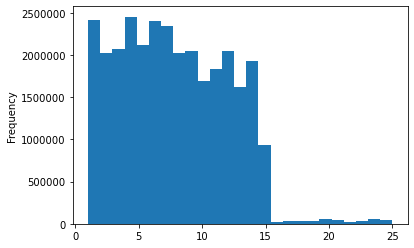

In [11]:
# Creating a bar chart for "prices" in the df_ords_prods_cust dataset
hist = df_ords_prods_cust['prices'].plot.hist(bins = 25)
hist.ticklabel_format(style='plain')

In [12]:
# Exporting the bar chart 
# Creating a path 
path = r'C:\Users\veren\Python Data\26-10-2021 Instacart Basket Analysis'

In [13]:
path

'C:\\Users\\veren\\Python Data\\26-10-2021 Instacart Basket Analysis'

In [14]:
# Exporting the bar chart
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_4.9_prices.png'))

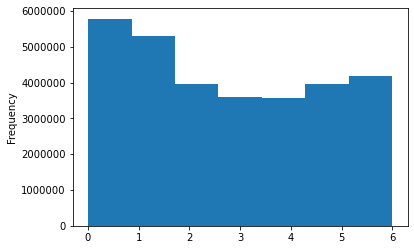

In [15]:
# Creating a histogram for "order days of the week" in the df_ords_prods_cust dataset (0 = Saturday, 1 Sunday, etc.)
hist2 = df_ords_prods_cust['order_dow'].plot.hist(bins = 7)
hist2.ticklabel_format(style='plain')

In [16]:
# Exporting the histogram
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_4.9_order_dow.png'))

<AxesSubplot:>

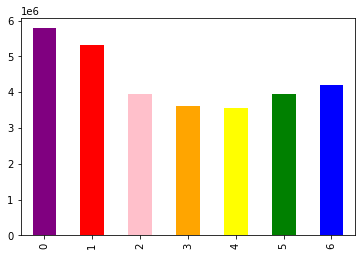

In [17]:
# Producing a bar chart with different colors for the "order_day_of_the_week" (order_dow) column
df_ords_prods_cust['order_dow'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue' ])

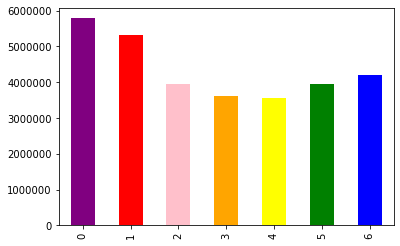

In [18]:
# Saving the bar chart for the "order_day_of_the_week" (order_dow) column and adjusting the ticklabel
bar = df_ords_prods_cust['order_dow'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue' ])
bar.ticklabel_format(style='plain', axis='y')

In [19]:
# Exporting the bar chart for df_ords_prods_cust
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_4.9_orders_dow.png'))


<AxesSubplot:xlabel='spending_flag', ylabel='income'>

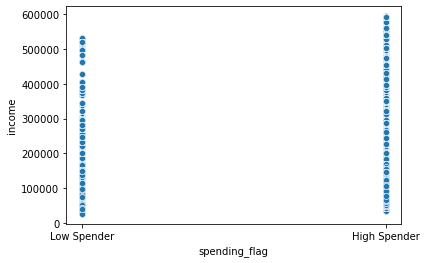

In [20]:
# Creating a scatterplot for the columns "spending_flag" and "income"
sns.scatterplot(x = 'spending_flag', y = 'income',data = df_ords_prods_cust)

In [21]:
# Creating a subset of the data for the line chart
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_cust)) <= 0.7

In [22]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [23]:
# Splitting the dataframe into 2 samples - "big" and "small"
# Storing 70% of the sample in the dataframe "big"
big = df_ords_prods_cust[dev]

In [24]:
# Storing 30% of the sample in the dataframe "small"
small = df_ords_prods_cust[~dev]

In [25]:
# Check
len(df_ords_prods_cust)

30356128

In [26]:
len(big) + len(small)

30356128

In [27]:
# Reducing the sample to only those coluns necessary for the "order_dow" and "prices" chart
df_ords_prods_cust2 = small[['order_dow','prices']]

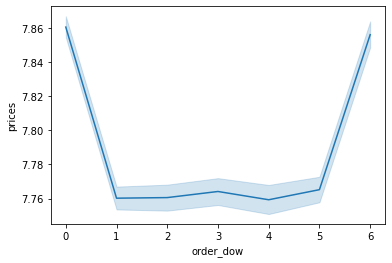

In [28]:
# Creating a line chart for a subset of the df_ords_prods_cust2 data
line1 = sns.lineplot(data = df_ords_prods_cust2, x = 'order_dow',y = 'prices')

In [29]:
# Exporting the line chart visualization
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line1_4.9_orders_dow_prices.png'))

### 04. Creating visualizations for the "order_hour_of_day" and "loyalty_flag" columns

<AxesSubplot:ylabel='Frequency'>

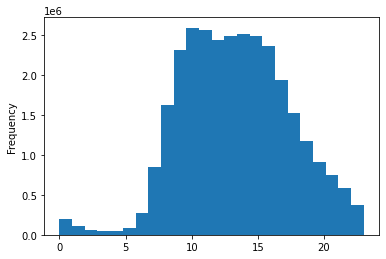

In [30]:
# Creating a histogram of the “order_hour_of_day” column
df_ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

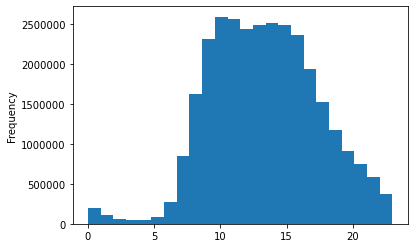

In [31]:
# Save the order_dow visualization
hist_order_hour_of_day =  df_ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)
hist_order_hour_of_day.ticklabel_format(style='plain')

In [32]:
# Exporting the "order_hour_of_day" visualization
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_4.9_order_hour_of_day.png'))

<AxesSubplot:>

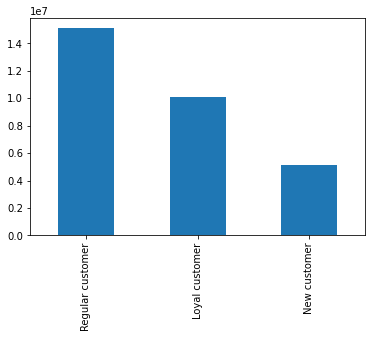

In [33]:
# Creating a bar chart from the “loyalty_flag” column.
df_ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

In [34]:
# Check
df_ords_prods_cust['loyalty_flag'].value_counts(dropna = False)

Regular customer    15095208
Loyal customer      10104845
New customer         5156075
Name: loyalty_flag, dtype: int64

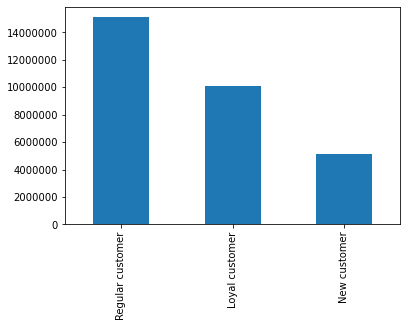

In [35]:
bar_loyalty = df_ords_prods_cust['loyalty_flag'].value_counts().plot.bar()
bar_loyalty.ticklabel_format(style='plain', axis='y')

In [36]:
# Exporting the bar_loyalty visualization
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_4.9_loyalty.png'))

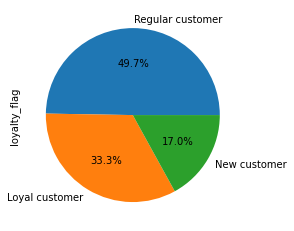

In [37]:
# Creating a pie chart for the "loyalty_flag" column
pie_loyalty = df_ords_prods_cust['loyalty_flag'].value_counts().plot.pie(autopct='%1.1f%%')

In [38]:
# Exporting the pie chart
pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_4.9_loyalty.png'))

### 05. Checking whether there is a difference in expenditure depending on the hour of the day

In [39]:
df_ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,family_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


In [40]:
# Reducing the small sample to only those columns necessary for the "order_hour_of_day" and "prices" chart
df_ords_prods_cust3 = small[['order_hour_of_day','prices']]

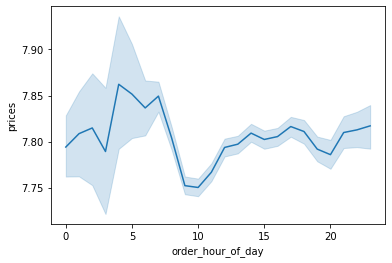

In [41]:
# Using a sample of the dataset for checking expenditure depending on the hour of the day
line2 = sns.lineplot(data = df_ords_prods_cust3, x = 'order_hour_of_day',y = 'prices')

In [42]:
# Exporting the line chart visualization
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_4.9_order_hour_of_day_prices.png'))

### 06. Exploratory analysis of customer demographics

In [43]:
# Reducing the "small" sample to only those columns necessary for the "age" and "n_dependants" chart
df_ords_prods_cust4 = small[['age','n_dependants']]

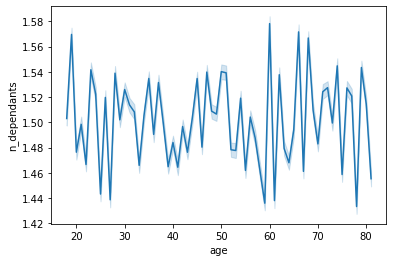

In [44]:
# Creating a line chart to analyse the connection between age and family status using age and nº of dependents data.
line3 = sns.lineplot(data = df_ords_prods_cust4, x = 'age',y = 'n_dependants')

The average of dependants is 1.5. Customers between 60 and 70 have more dependants than younger and older customers.

In [45]:
# Exporting the line chart visualization
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line3_4.9_age_n_dependants.png'))

### 07. Explore whether there is a connection between age and spending power

MemoryError: Unable to allocate 232. MiB for an array with shape (30356128,) and data type int64

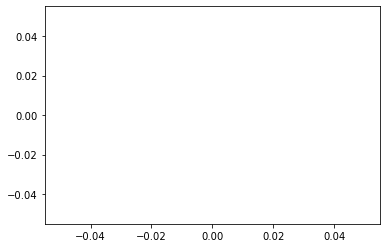

In [46]:
# Creating a scatterplot to visualize the relationship between age and spending power
scatterplot1 = sns.scatterplot(x = 'age', y = 'spending',data = df_ords_prods_cust)

I am running out of memory. I have rerun the notebook several times and wasn't able to produce the scatterplot so I stop at this point.
